# Chapter 8, Example 4a

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pylab
import os

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

creating the figures folder


In [ ]:
# Hyperparameters
n_in = 2
n_hidden = 10
n_out = 1
n_steps = 16
n_seqs = 64
n_iters = 10000
lr = 0.001
seed = 10

np.random.seed(seed)
torch.manual_seed(seed)

# Generating Training Data

This section outlines the process of generating synthetic training data for the model.


## Input Data (`x_train`):

- **`x_train`**:
    - A numpy array of shape `(n_seqs, n_steps, n_in)`.
    - The values are randomly generated using `np.random.rand()`, which produces values between 0 and 1.

## Ground Truth Data (`y_train`):

1. **Initialization**:
    - A numpy array of zeros with shape `(n_seqs, n_steps, n_out)`.

2. **Computation**:
    - For the time steps from 7 onwards:
        - The values are computed based on a synthetic formula that uses values from `x_train` at various time steps.

3. **Noise Addition**:
    - Gaussian noise (with a standard deviation of 0.1) is added to `y_train` to introduce variability and make the data more realistic.

## Conversion to PyTorch Tensors:

- **`x_train`**:
    - The numpy array is converted to a PyTorch tensor with data type `torch.float32`.

- **`y_train`**:
    - Similarly, the ground truth data is converted to a PyTorch tensor with data type `torch.float32`.

By following the above steps, we have generated synthetic input data and corresponding ground truth values, which can be used to train a machine learning model.



In [ ]:
# Generate training data
x_train = np.random.rand(n_seqs, n_steps, n_in)
y_train = np.zeros([n_seqs, n_steps, n_out])
y_train[:, 7:, 0] = 5 * x_train[:, 6:-1, 0] * x_train[:, 5:-2, 1] - 2 * x_train[:, :-7, 0] + 3.5 * x_train[:, 2:-5, 1]**2
y_train += 0.1 * np.random.randn(n_seqs, n_steps, n_out)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# SeriesPredictor Model

The `SeriesPredictor` class defines a model architecture for time series prediction using an LSTM (Long Short-Term Memory) network.

## Class Initialization:

1. **Parameters**:
    - `input_dim`: Dimensionality of the input data.
    - `seq_size`: Length of the input sequence.
    - `num_steps`: Number of time steps in the sequence.
    - `hidden_dim`: Number of hidden units in the LSTM layer (default is set to 10).

2. **Attributes**:
    - `input_dim`, `seq_size`, `hidden_dim`, and `num_steps` are stored as class attributes for later use.

3. **LSTM Layer (`self.rnn`)**:
    - An LSTM layer with `input_dim` input features and `hidden_dim` hidden units.
    - `batch_first=True` indicates that the input tensor's first dimension will represent the batch size.

4. **Linear Layer (`self.linear`)**:
    - A fully connected linear layer that maps from `hidden_dim` features to a single output feature. This is used to produce the final prediction for each time step.

## Forward Method:

1. **LSTM Forward Pass**:
    - The input `x` is passed through the LSTM layer. The LSTM returns the output for each time step and the final hidden and cell states. Since we're only interested in the output for each time step, we discard the hidden and cell states.

2. **Linear Layer**:
    - The output from the LSTM layer is passed through the linear layer to produce the final prediction for each time step.

3. **Return**:
    - The final predicted values for each time step are returned.

This `SeriesPredictor` model is designed to predict a value at each time step based on the previous values in the sequence, making it suitable for time series forecasting tasks.



In [ ]:
class SeriesPredictor(nn.Module):
    def __init__(self, input_dim, seq_size, num_steps, hidden_dim=10):
        super(SeriesPredictor, self).__init__()
        self.input_dim = input_dim
        self.seq_size = seq_size
        self.hidden_dim = hidden_dim
        self.num_steps = num_steps

        self.rnn = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.linear(out)
        return out

In [ ]:
predictor = SeriesPredictor(input_dim=n_in, seq_size=n_seqs, num_steps=n_steps, hidden_dim=n_hidden)
optimizer = optim.Adam(predictor.parameters(), lr=lr)
criterion = nn.MSELoss()

In [ ]:
losses = []
for i in range(n_iters):
    optimizer.zero_grad()
    outputs = predictor(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if not i % 100:
        print('iter:%d, cost: %g' % (i, losses[i]))

pred = predictor(x_train)

iter:0, cost: 2.86723
iter:100, cost: 1.84353
iter:200, cost: 1.68354
iter:300, cost: 1.49551
iter:400, cost: 1.23575
iter:500, cost: 1.14211
iter:600, cost: 1.08721
iter:700, cost: 1.04611
iter:800, cost: 1.01109
iter:900, cost: 0.96306
iter:1000, cost: 0.888394
iter:1100, cost: 0.750137
iter:1200, cost: 0.629477
iter:1300, cost: 0.537271
iter:1400, cost: 0.461748
iter:1500, cost: 0.399562
iter:1600, cost: 0.353536
iter:1700, cost: 0.315172
iter:1800, cost: 0.285175
iter:1900, cost: 0.262974
iter:2000, cost: 0.245295
iter:2100, cost: 0.233586
iter:2200, cost: 0.219995
iter:2300, cost: 0.20996
iter:2400, cost: 0.201154
iter:2500, cost: 0.193186
iter:2600, cost: 0.186034
iter:2700, cost: 0.179596
iter:2800, cost: 0.1738
iter:2900, cost: 0.169215
iter:3000, cost: 0.16358
iter:3100, cost: 0.15911
iter:3200, cost: 0.154904
iter:3300, cost: 0.150893
iter:3400, cost: 0.147028
iter:3500, cost: 0.143024
iter:3600, cost: 0.140544
iter:3700, cost: 0.135038
iter:3800, cost: 0.130961
iter:3900, co

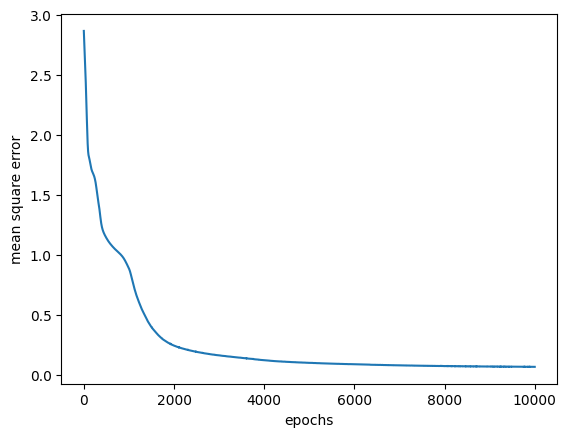

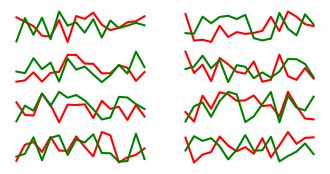

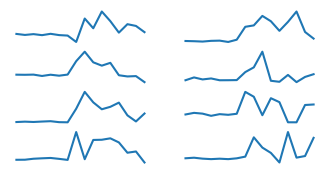

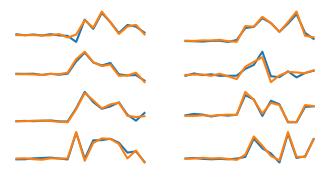

In [ ]:
# Plotting
pylab.figure()
pylab.plot(range(n_iters), losses)
pylab.xlabel('epochs')
pylab.ylabel('mean square error')
pylab.savefig('./figures/9.1a_1.pdf')

pylab.figure(figsize=(4, 2))
for i in range(8):
    ax = pylab.subplot(4, 2, i+1)
    pylab.axis('off')
    ax.plot(range(n_steps), x_train[i, :, 0].numpy(), 'r')
    ax.plot(range(n_steps), x_train[i, :, 1].numpy(), 'g')
    pylab.savefig('./figures/9.1a_2.pdf')

pylab.figure(figsize=(4, 2))
for i in range(8):
    ax = pylab.subplot(4, 2, i+1)
    pylab.axis('off')
    ax.plot(range(n_steps), y_train[i, :, 0].numpy())
    pylab.savefig('./figures/9.1a_3.pdf')

pylab.figure(figsize=(4, 2))
for i in range(8):
    ax = pylab.subplot(4, 2, i+1)
    pylab.axis('off')
    ax.plot(range(n_steps), y_train[i, :, 0].numpy())
    ax.plot(range(n_steps), pred[i, :, 0].detach().numpy())
    pylab.savefig('./figures/9.1a_4.pdf')

pylab.show()
